# DATAFRAME TÉCNICO

In [89]:
import re
import os
import xml.etree.ElementTree as ET
import mysql.connector 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Creamos un dataframe dónde incluimos sólo a las mujeres que trabajan actualmente como ingenieras de Machine Learning.

In [90]:
cnx = mysql.connector.connect(user='root', password='AlumnaAdalab',
                              host='127.0.0.1',
                              database='proyecto_1_equipo_1')
mycursor = cnx.cursor()
mycursor.execute("""SELECT xml.age, txt.q3, txt.q4, txt.q17, txt.q6, txt.q15, txt.q7
                    FROM data_txt AS txt
                    INNER JOIN data_xml AS xml
                    ON txt.index_sql = xml.index_sql 
                    WHERE xml.gender = "Woman" AND txt.q5 = "Machine Learning Engineer" """)

myresult = mycursor.fetchall()
df_tecnico = pd.DataFrame(myresult, columns = ["edad","pais", "nivel de estudios", "algoritmos ML", "años de experiencia", "años de experiencia en ML", "lenguaje mas usado"])
cnx.close()

In [91]:
df_tecnico.head()

,edad,pais,nivel de estudios,algoritmos ML,años de experiencia,años de experiencia en ML,lenguaje mas usado
0,25-29,Poland,Master’s degree,"NULL, Decision Trees or Random Forests, Gradie...",3-5 years,Under 1 year,"Python, C++"
1,30-34,Viet Nam,Master’s degree,"NULL, Dense Neural Networks (MLPs, etc), Convo...",1-3 years,1-2 years,Python
2,22-24,Morocco,Master’s degree,"NULL, None",1-3 years,Under 1 year,"Python, SQL, MATLAB, Other"
3,18-21,Bangladesh,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",under 1 years,Under 1 year,Python
4,18-21,India,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",1-3 years,Under 1 year,"Python, SQL, C, C++"


### Creamos una nueva columna con los continentes usando "apply()".

In [92]:
continente1 = ['India', 'Turkey','Viet Nam', 'Bangladesh', 'Indonesia', 
        'Singapore', 'Taiwan', 'Hong Kong (S.A.R.)', 'Israel', 'Pakistan', 'Philippines', 'United Arab Emirates', 'Thailand', 'Japan', 'China', 'South Korea', 
       'Saudi Arabia', 'Malaysia', 'Kazakhstan', 'Nepal']

continente2 = ['Iran, Islamic Republic of...', 'Egypt','Morocco','Tunisia','Nigeria','Kenya','South Africa',
       'Algeria','Ghana','Uganda', 'Ethiopia', 'Iraq']

continente3 = ['Poland','Russia', 'Italy', 'Sweden',
       'Ireland', 'United Kingdom of Great Britain and Northern Ireland','Spain',
       'Germany', 'Belgium', 'Austria',
       'France', 'Romania', 'Ukraine', 
       'Netherlands', 'Portugal', 'Norway',
       'Czech Republic', 'Greece', 'Switzerland',
       'Denmark','Belarus']

continente4 = ['United States of America','Canada']

continente5 = ['Brazil', 'Argentina','Colombia', 'Mexico', 'Peru', 'Ecuador','Chile']

continente6 = ['Australia']

In [93]:
def continente(pais):
    if pais in continente1:
        return "Asia"
    elif pais in continente2:
        return "África"
    elif pais in continente3:
        return "Europa"
    elif pais in continente4:
        return "América del Norte"
    elif pais in continente5:
        return "América del Sur"
    elif pais in continente6:
        return "Oceanía"

In [94]:
df_tecnico["continente"] = df_tecnico["pais"].apply(continente)

In [95]:
df_tecnico.head()

,edad,pais,nivel de estudios,algoritmos ML,años de experiencia,años de experiencia en ML,lenguaje mas usado,continente
0,25-29,Poland,Master’s degree,"NULL, Decision Trees or Random Forests, Gradie...",3-5 years,Under 1 year,"Python, C++",Europa
1,30-34,Viet Nam,Master’s degree,"NULL, Dense Neural Networks (MLPs, etc), Convo...",1-3 years,1-2 years,Python,Asia
2,22-24,Morocco,Master’s degree,"NULL, None",1-3 years,Under 1 year,"Python, SQL, MATLAB, Other",África
3,18-21,Bangladesh,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",under 1 years,Under 1 year,Python,Asia
4,18-21,India,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",1-3 years,Under 1 year,"Python, SQL, C, C++",Asia


In [96]:
df_tecnico["algoritmos ML"].value_counts()

                                                                                                                                                                                                                              33
Linear or Logistic Regression, Decision Trees or Random Forests, Gradient Boosting Machines (xgboost, lightgbm, etc)                                                                                                          10
Linear or Logistic Regression                                                                                                                                                                                                  8
Linear or Logistic Regression, Decision Trees or Random Forests                                                                                                                                                                8
Linear or Logistic Regression, Decision Trees or Random Forests, Convolutional Neural Networks      

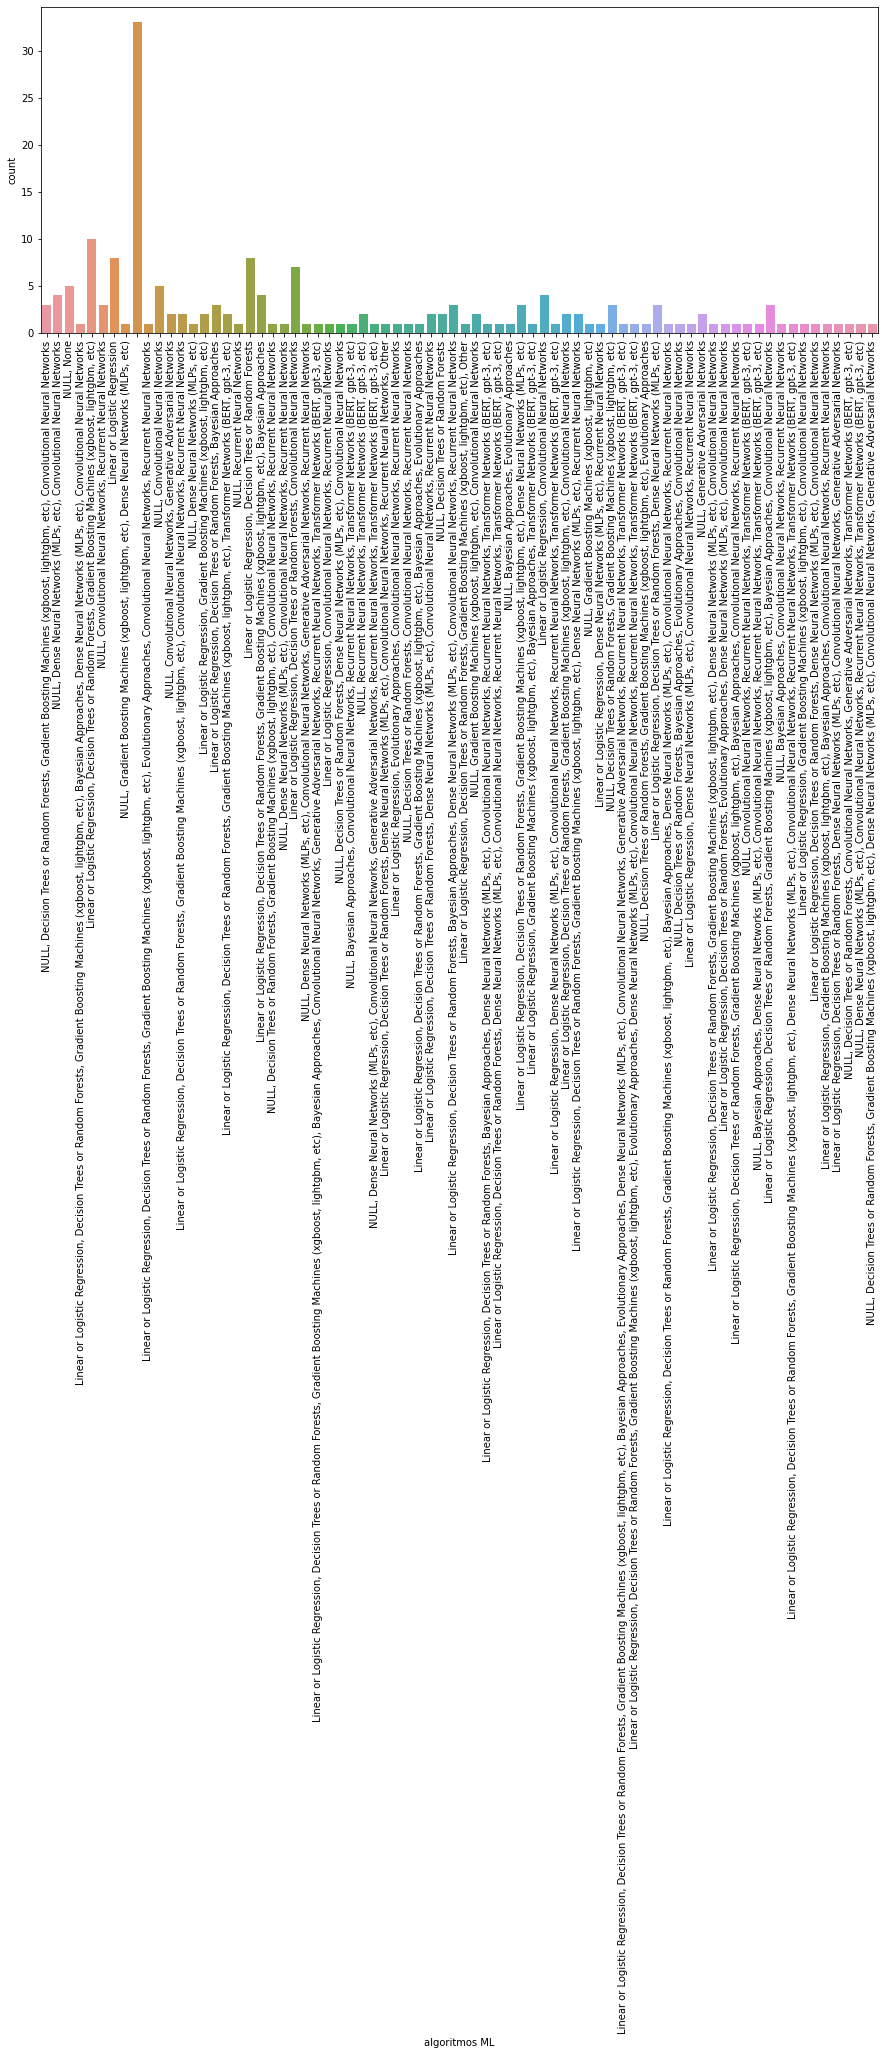

In [82]:
plt.figure(figsize=(15,6))

fig = sns.countplot(x =  df_tecnico["algoritmos ML"])

plt.xticks(rotation = 90)
plt.show()

In [83]:
df_tecnico = df_tecnico[df_tecnico['lenguaje mas usado'] != ""]
df_tecnico.head()

,edad,pais,nivel de estudios,algoritmos ML,años de experiencia,años de experiencia en ML,lenguaje mas usado,continente
0,25-29,Poland,Master’s degree,"NULL, Decision Trees or Random Forests, Gradie...",3-5 years,Under 1 year,"Python, C++",Europa
1,30-34,Viet Nam,Master’s degree,"NULL, Dense Neural Networks (MLPs, etc), Convo...",1-3 years,1-2 years,Python,Asia
2,22-24,Morocco,Master’s degree,"NULL, None",1-3 years,Under 1 year,"Python, SQL, MATLAB, Other",África
3,18-21,Bangladesh,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",under 1 years,Under 1 year,Python,Asia
4,18-21,India,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",1-3 years,Under 1 year,"Python, SQL, C, C++",Asia


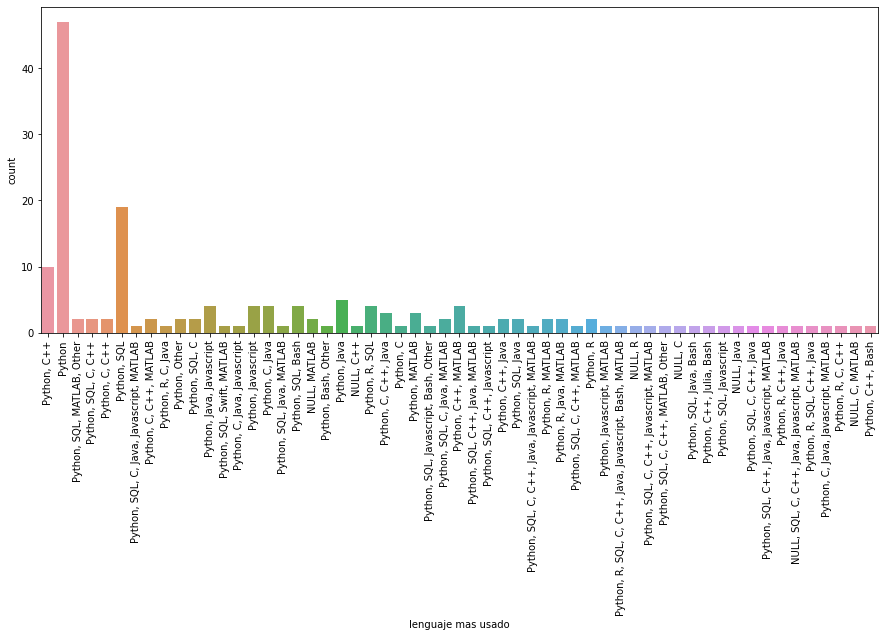

In [84]:
plt.figure(figsize=(15,6))

fig = sns.countplot(x =  df_tecnico["lenguaje mas usado"])

plt.xticks(rotation = 90)
plt.show()

In [97]:
df_tecnico["lenguaje mas usado"].value_counts()

Python                                                    47
Python, SQL                                               19
Python, C++                                               10
                                                          10
Python, Java                                               5
Python, Java, Javascript                                   4
Python, R, SQL                                             4
Python, SQL, Bash                                          4
Python, C, Java                                            4
Python, Javascript                                         4
Python, C++, MATLAB                                        4
Python, MATLAB                                             3
Python, C, C++, Java                                       3
Python, SQL, C, C++                                        2
Python, R                                                  2
Python, R, Java, MATLAB                                    2
Python, R, MATLAB       

### Creamos nuevas columnas con cada lenguaje para poder analizar fácilmente los datos.

In [98]:
def python(lenguaje):
    x = lenguaje.split(",")
    for i in x:
        if i == "Python":
            return "Yes"
        else: 
            return "No"

In [99]:
df_tecnico["python"] = df_tecnico["lenguaje mas usado"].apply(python)

In [125]:
df_tecnico.head()

,edad,pais,nivel de estudios,algoritmos ML,años de experiencia,años de experiencia en ML,lenguaje mas usado,continente,python,c,java
0,25-29,Poland,Master’s degree,"NULL, Decision Trees or Random Forests, Gradie...",3-5 years,Under 1 year,"Python, C++",Europa,Yes,No,No
1,30-34,Viet Nam,Master’s degree,"NULL, Dense Neural Networks (MLPs, etc), Convo...",1-3 years,1-2 years,Python,Asia,Yes,No,No
2,22-24,Morocco,Master’s degree,"NULL, None",1-3 years,Under 1 year,"Python, SQL, MATLAB, Other",África,Yes,No,No
3,18-21,Bangladesh,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",under 1 years,Under 1 year,Python,Asia,Yes,No,No
4,18-21,India,Bachelor’s degree,"Linear or Logistic Regression, Decision Trees ...",1-3 years,Under 1 year,"Python, SQL, C, C++",Asia,Yes,No,No


In [111]:
def java(lenguaje):
    x = lenguaje.split(",")
    for i in x:
        if i == "Java":
            return "Yes"
        else: 
            return "No"

In [112]:
df_tecnico["java"] = df_tecnico["lenguaje mas usado"].apply(java)

In [ ]:
def cplus(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "C++" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["c++"] = df_tecnico["lenguaje mas usado"].apply(cplus)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/1640834712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["c++"] = df_tecnico["lenguaje mas usado"].apply(cplus)


In [ ]:
def sql(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "SQL" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["sql"] = df_tecnico["lenguaje mas usado"].apply(sql)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/282700606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["sql"] = df_tecnico["lenguaje mas usado"].apply(sql)


In [ ]:
def r(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "R" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["r"] = df_tecnico["lenguaje mas usado"].apply(r)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/2672450099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["r"] = df_tecnico["lenguaje mas usado"].apply(r)


In [ ]:
def javascript(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "Javascript" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["javascript"] = df_tecnico["lenguaje mas usado"].apply(javascript)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/1982961966.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["javascript"] = df_tecnico["lenguaje mas usado"].apply(javascript)


In [ ]:
def julia(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "Julia" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["julia"] = df_tecnico["lenguaje mas usado"].apply(julia)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/532466717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["julia"] = df_tecnico["lenguaje mas usado"].apply(julia)


In [ ]:
def swift(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "Swift" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["swift"] = df_tecnico["lenguaje mas usado"].apply(swift)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/2042969567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["swift"] = df_tecnico["lenguaje mas usado"].apply(swift)


In [ ]:
def bash(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "Bash" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["bash"] = df_tecnico["lenguaje mas usado"].apply(bash)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/2186359050.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["bash"] = df_tecnico["lenguaje mas usado"].apply(bash)


In [ ]:
def matlab(x):
    for a in df_tecnico["lenguaje mas usado"]:
        lista = a.split(",")
        if "MATLAB" in lista:
            return "Yes"
        else: 
            return "No"

In [ ]:
df_tecnico["matlab"] = df_tecnico["lenguaje mas usado"].apply(matlab)

/var/folders/q5/d6h10gfs1b33l8qy7mdmhspw0000gq/T/ipykernel_47022/379056592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tecnico["matlab"] = df_tecnico["lenguaje mas usado"].apply(matlab)
